  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving Abiral_Pandey_Fullstack_Java.docx to Abiral_Pandey_Fullstack_Java (4).docx
Saving Adelina_Erimia_PMP1.docx to Adelina_Erimia_PMP1 (5).docx
Saving Adhi Gopalam - SM.docx to Adhi Gopalam - SM (4).docx
Saving AjayKumar.docx to AjayKumar (4).docx
Saving Ami Jape.docx to Ami Jape (4).docx
Uploaded files: ['Abiral_Pandey_Fullstack_Java (4).docx', 'Adelina_Erimia_PMP1 (5).docx', 'Adhi Gopalam - SM (4).docx', 'AjayKumar (4).docx', 'Ami Jape (4).docx']

📂 Processing: Abiral_Pandey_Fullstack_Java (4).docx

📂 Processing: Adelina_Erimia_PMP1 (5).docx

📂 Processing: Adhi Gopalam - SM (4).docx

📂 Processing: AjayKumar (4).docx

📂 Processing: Ami Jape (4).docx

✅ Parsed All Resumes:


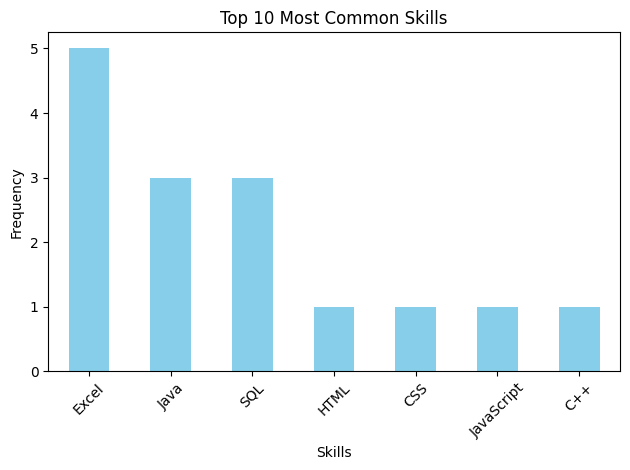

/tmp/ipython-input-19-2649380472.py:85: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-2649380472.py:85: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


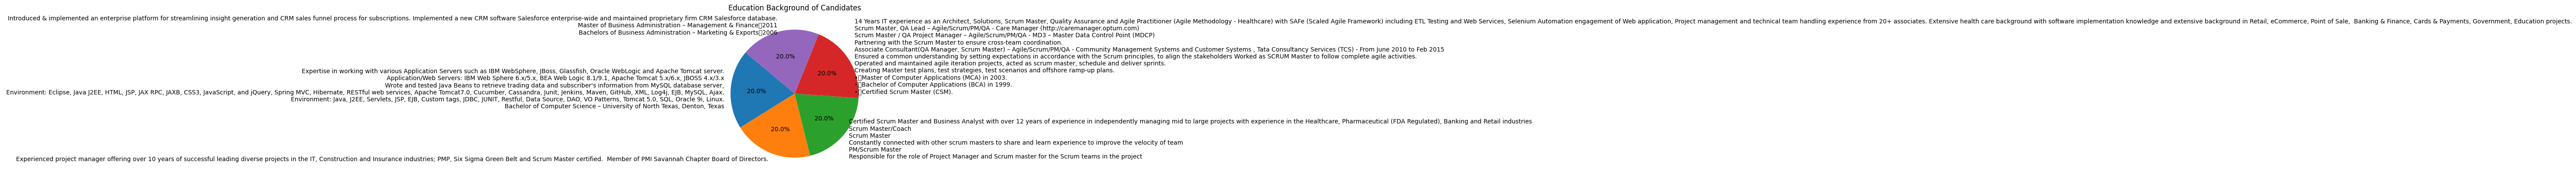

KeyError: "None of [Index(['Years'], dtype='object')] are in the [columns]"

In [ ]:
!pip install python-docx spacy
!python -m spacy download en_core_web_sm
from google.colab import files
uploaded = files.upload()
resume_files = list(uploaded.keys())
print("Uploaded files:", resume_files)
import docx
import re
import spacy
import pandas as pd
nlp = spacy.load("en_core_web_sm")
def extract_text_from_docx(docx_file):
    text = ""
    doc = docx.Document(docx_file)
    for para in doc.paragraphs:
        text += para.text + "\n"
    return text
def extract_email(text):
    match = re.findall(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", text)
    return match[0] if match else ""
def extract_phone(text):
    match = re.findall(r"(\+?\d[\d -]{8,}\d)", text)
    return match[0] if match else ""
def extract_name(text):
    doc = nlp(text)
    names = [ent.text for ent in doc.ents if ent.label_ == "PERSON"]
    return names[0] if names else ""
def extract_skills(text):
    skill_keywords = ['Python', 'Java', 'SQL', 'Machine Learning', 'Excel', 'C++', 'HTML', 'CSS', 'JavaScript']
    return ', '.join([kw for kw in skill_keywords if kw.lower() in text.lower()])
def extract_education(text):
    education_keywords = ['B.Tech', 'B.E.', 'M.Tech', 'MCA', 'BSc', 'MSc', 'Bachelor', 'Master', 'Diploma', 'Degree', '12th', '10th']
    lines = text.split('\n')
    education_lines = [line for line in lines if any(edu.lower() in line.lower() for edu in education_keywords)]
    return "\n".join(education_lines) if education_lines else "Not Found"

def extract_experience(text):
    experience_keywords = ['Experience', 'Worked at', 'Internship', 'Intern', 'Company', 'Years', 'Responsibilities', 'Projects']
    lines = text.split('\n')
    experience_lines = [line for line in lines if any(exp.lower() in line.lower() for exp in experience_keywords)]
    return "\n".join(experience_lines) if experience_lines else "Not Found"
all_data = []

for file in resume_files:
    print(f"\n📂 Processing: {file}")
    text = extract_text_from_docx(file)

    if text.strip():
        data = {
            "File Name": file,
            "Name": extract_name(text),
            "Email": extract_email(text),
            "Phone": extract_phone(text),
            "Skills": extract_skills(text),
            "Education": extract_education(text),
            "Experience": extract_experience(text)
        }
        all_data.append(data)
    else:
        print(f"⚠️ No text extracted from: {file}")

df = pd.DataFrame(all_data)
print("\n✅ Parsed All Resumes:")
df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(all_data)
skills_series = df['Skills'].str.split(',').explode().str.strip()
top_skills = skills_series.value_counts().head(10)

top_skills.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Skills")
plt.xlabel("Skills")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
education_counts = df['Education'].value_counts().head(5)

education_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Education Background of Candidates")
plt.ylabel('')
plt.tight_layout()
plt.show()
sns.heatmap(df[['Years']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression

st.title("Resume Suitability Predictor")

# Input fields
skills = st.text_input("Enter Skills (comma-separated):")
education = st.text_input("Enter Education:")
experience = st.text_input("Enter Experience:")

if st.button("Predict"):
    # Simulate a row
    input_data = pd.DataFrame([{
        "Skills": skills,
        "Education": education,
        "Experience": experience
    }])
    input_data = pd.get_dummies(input_data)

    # Match columns with trained data
    for col in X.columns:
        if col not in input_data.columns:
            input_data[col] = 0
    input_data = input_data[X.columns]  # Ensure column order

    # Predict
    prediction = model.predict(input_data)
    if prediction[0] == 1:
        st.success("✅ Suitable Candidate!")
    else:
        st.error("❌ Not Suitable Candidate.")


